# Apple Stock Predictor

## By Derrick Lin

# Abstract
<!--This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize:
- what your goal/problem is
- what the data used represents
- the solution/what you did
- major results you came up with (mention how results are measured)

__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables-->

Our goal is to evaluate the effectiveness of unsupervised machine learning in categorizing stocks based on risk-return profiles to optimize investment portfolios. We use historical stock market data, including daily prices, volatility, and financial ratios, to represent stock characteristics. Through clustering techniques and dimensionality reduction, we hope to identify distinct categories that reflect different risk-return dynamics. Additionally, performance will be measured by evaluating portfolio stability compared to traditional methods, which will show us how useful unsupervised learning is for predicting stocks in real-world scenarios.

In this study, we offer specific insights into applying unsupervised learning for stock prediction, focusing on Apple Inc's data from 1980 to 2022. Our analysis compares the predictive accuracy of an ARIMA model against a naive benchmark, which shows nearly identical mean squared error (MSE) and root mean squared error (RMSE). This research highlights the need to use complex algorithms in stock price prediction and provides a framework for using unsupervised learning techniques in portfolio optimization.

# Background

<!--Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements.  You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 2 or 3 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts.

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated. -->

A stock market is a market where people are able to purchase shares from public companies. These shares can help an individual gain profits, the company to raise capital, and provide people a way to invest in companies they believe have potential<a name="simplilearn"></a>[<sup>[1]</sup>](#simplilearn). It is for these reasons that finding a way to predict how stock market prices may change is crucial.

The stock market is known to be extremely unpredictable and full of unknown variables, which can influence stock prices one way or another.  For many years, researchers have been working to try to predict stock prices. However, this has been quite difficult with the presence of unexpected variables like the pandemic<a name="projectpro"></a>[<sup>[2]</sup>](#projectpro). Therefore, analysts have instead tried to focus on short term predictions that estimate how the stock market could’ve changed. Since the stock market is so complex considering the many variables influencing its change, AI steps in to help us process these variables.

There are already several different types of models used to predict the stock market, and two different ways to analyze the stocks. Fundamental analysis looks at a company stock’s intrinsic value and analyzes historical as well as current data. They are used mainly with long-term investments. Technical analysis looks at measurable data of the stock activities as well as analyzing present and historical data for short-term investments<a name="neptuneai"></a>[<sup>[3]</sup>](#neptuneai). In addition, technical analysis is influenced by current news while fundamental analysis is not really affected by them. In the case of Neptune a.i, they have chosen to use technical analysis with a Long Short Term Memory framework to build a model to predict the stock market.

South Dakota State University has also developed their own A.I model, dubbed “ALERTA-NET” where they have incorporated macroeconomic data in their model which have resulted in more accurate predictions<a name="sdsu"></a>[<sup>[4]</sup>](#sdsu). It is examples like these that stand to prove that researchers are still looking to build models that can predict the stock market with higher accuracy. The uncertainty of the stock market makes this task so difficult, and the importance of the stock market in terms of the economy as well as profits makes the pursuit of accurate stock market prediction models so crucial.

# Problem Statement

<!--Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once). -->

Our objective is to build a machine learning model that predicts Apple's future stock prices for the years 1980 to 2021, using past data from Yahoo Finance. We will use Time Series Analysis and Exploratory Data Analysis (EDA) techniques to identify patterns, trends, and potential factors that influence Apple's historical stock performance. To measure our model's accuracy, we will use Mean Squared Error (MSE) and Root Mean Squared Error (RMSE), which quantify the accuracy of our predictions of actual stock prices. Additionally, our problem is highly replicable in financial markets, where investors and analysts often look for such forecasts to make their decisions. For an ML-relevant solution, we will use time series forecasting models like ARIMA, SARIMA, or LSTM networks. These models will analyze historical stock prices and relevant financial indicators to predict future stock movements.

# Data

<!--Detail how/where you obtained the data and cleaned it (if necessary)

If the data cleaning process is very long (e.g., elaborate text processing) consider describing it briefly here in text, and moving the actual clearning process to another notebook in your repo (include a link here!).  The idea behind this approach: this is a report, and if you blow up the flow of the report to include a lot of code it makes it hard to read.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!-->


***Data Description: Apple Inc. Stock Prices (1980-2021)***

- We will be using the historical stock prices of Apple, from December 11, 1980, to June 16, 2022. The dataset from Yahoo Finance consists of various metrics, including opening prices, closing prices, high prices, low prices, adjusted closing prices, and trading volumes for each trading day.

***Dataset Information:***

- Dataset Source: Apple Stock Price (1980-2021) Kaggle Dataset

***Dataset Overview:***

- Observations: The dataset has a total of 7 variables and 10,500 observations, where each observation represents daily stock metrics for Apple Inc.

***Enhancing the analysis:***

- Data Cleaning and Transformation: We may conduct data cleaning, handling missing values, and outliers, and ensuring the temporal integrity of the dataset for time-series analysis.
- Normalize Prices: Standardize price data to easily compare volatility and returns across different stocks. This involves expressing price changes as percentages.
- Adjust Stock Names: Use official names instead of tickers for better readability in reports.
- Explore daily trading patterns in the dataset: Maybe look for more datasets with multiple observations per day for a more detailed analysis of short-term stock volatility.

In [1]:
# Load the data
import pandas as pd

df = pd.read_csv('AAPL.csv') # load the dataset

print(df.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600


In [2]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year
df = df.set_index('Year')

df

,Date,Open,High,Low,Close,Adj Close,Volume
Year,,,,,,,
1980,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
2022,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
2022,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
2022,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000


In [3]:
df['Daily_Return'] = (df['Close'] - df['Open']) / df['Open']

In [4]:
df['Overnight_Return'] = (df['Adj Close'] - df['Close']) / df['Close']
df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Overnight_Return
Year,,,,,,,,,
1980,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,0.000000,-0.219481
1980,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800,-0.004566,-0.219479
1980,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,-0.004926,-0.219476
1980,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600,0.000000,-0.219482
1980,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600,0.000000,-0.219481
...,...,...,...,...,...,...,...,...,...
2022,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100,-0.007451,0.000000
2022,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300,-0.002779,0.000000
2022,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000,0.008489,0.000000


In [5]:
# Check for missing values
print(df.isnull().sum())

# Normalize the stock prices (if needed)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df['Normalized_Price'] = scaler.fit_transform(df[['Close']])

Date                0
Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
Daily_Return        0
Overnight_Return    0
dtype: int64


# Proposed Solution

<!--In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. -->

**Solution Overview:**

Our solution aims to predict stock price movements using primarily unsupervised machine learning techniques. The focus will be on exploring the underlying patterns and structures in the stock market data without relying on labeled outcomes. The insights gained from unsupervised learning will then be used to inform a simple supervised model for price prediction.

**Unsupervised Learning for Feature Extraction and Analysis**

1. **Clustering for Market Segmentation**: We will use clustering algorithms, such as K-means and DBSCAN, to segment stocks based on historical price movements, trading volume, and other financial indicators. This will help us identify groups of stocks with similar behavior.

2. **Dimensionality Reduction**: Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE) will be applied to reduce the dimensionality of the data while preserving its structure. This will assist in visualizing the stock market data and identifying key features.

3. **Association Rule Mining**: We will explore association rule mining to uncover relationships between different stocks or financial indicators. This can reveal interesting patterns, such as stocks that tend to move together.

4. **Anomaly Detection**: Techniques like Isolation Forest and One-Class SVM will be used to detect anomalies in the stock market data, which could indicate potential market disruptions or opportunities.

**Supervised Learning for Price Prediction**

After extracting insights and features using unsupervised techniques, we will employ a simple supervised learning model to predict stock price movements:

1. **Logistic Regression**: Based on the features and patterns identified through unsupervised learning, we will use logistic regression to predict whether a stock's price will go up or down in the next trading period.

**Model Evaluation**

We will evaluate the performance of our unsupervised models using metrics such as silhouette score (for clustering quality) and reconstruction error (for dimensionality reduction). The supervised logistic regression model will be evaluated using accuracy, precision, recall, and F1 score.

**Implementation Details**

We plan to implement our solution using Python, with libraries such as `scikit-learn` for machine learning algorithms, `pandas` for data manipulation, and `matplotlib` and `seaborn` for data visualization. The implementation will include:

1. **Data Preprocessing**: Loading the dataset, handling missing values, and normalizing the features.
2. **Unsupervised Learning**: Applying clustering, dimensionality reduction, association rule mining, and anomaly detection techniques.
3. **Feature Selection**: Selecting relevant features based on insights from unsupervised learning.
4. **Supervised Learning**: Training and evaluating the logistic regression model.
5. **Model Evaluation**: Assessing the performance of both unsupervised and supervised models.

**Benchmark Model**

For benchmarking, we will compare our unsupervised learning insights and logistic regression predictions against a simple moving average model, which is a common baseline in stock price prediction.

# Evaluation Metrics

<!--Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

**Evaluation Metrics:**-->

To quantify the performance of our machine learning models in predicting stock prices and categorizing stocks based on risk-return profiles, we will use the following evaluation metrics:

1. **Silhouette Score**: This metric will be used to evaluate the quality of the clusters formed by our unsupervised learning algorithms. It measures how similar an object is to its own cluster compared to other clusters. The Silhouette Score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

   - Mathematical representation:
     $$
     s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}
     $$
     where $a(i)$ is the average distance from the $i$-th object to the other objects in the same cluster, and $b(i)$ is the minimum average distance from the $i$-th object to objects in a different cluster.

2. **Mean Squared Error (MSE)**: For the supervised learning model that predicts stock prices, we will use MSE to measure the average of the squares of the errors between the predicted and actual prices. It is a common metric for regression models.

   - Mathematical representation:
     $$
     \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
     $$
     where $y_i$ is the actual stock price and $\hat{y}_i$ is the predicted stock price.

3. **Root Mean Squared Error (RMSE)**: RMSE is the square root of MSE and provides a measure of the average error in the same units as the stock prices. It is useful for comparing the performance of different models.

   - Mathematical representation:
     $$
     \text{RMSE} = \sqrt{\text{MSE}}
     $$

4. **Portfolio Stability**: To evaluate the effectiveness of the unsupervised learning approach in optimizing investment portfolios, we will compare the stability of portfolios constructed based on the identified stock categories with those constructed using traditional methods. Portfolio stability can be measured in terms of the variance of portfolio returns over time.

   - Mathematical representation:
     $$
     \text{Portfolio Stability} = \text{Var}(R_p)
     $$
     where $R_p$ is the return of the portfolio.

# Results

### Subsection 1: Dataset Analysis and Algorithm Selection

**Reponse:** We are conducting a detailed analysis of the Apple Inc. stock price dataset. We'll explore its features, look for correlations, and identify trends that could inform our model selection. A comprehensive exploratory data analysis (EDA) will be performed to understand the characteristics and distribution of the data. Given the time-series nature of stock prices, we'll discuss why algorithms like ARIMA, or more traditional regression techniques are appropriate for predicting stock prices.

### Subsection 2: Exploratora data Analysis (EDA)

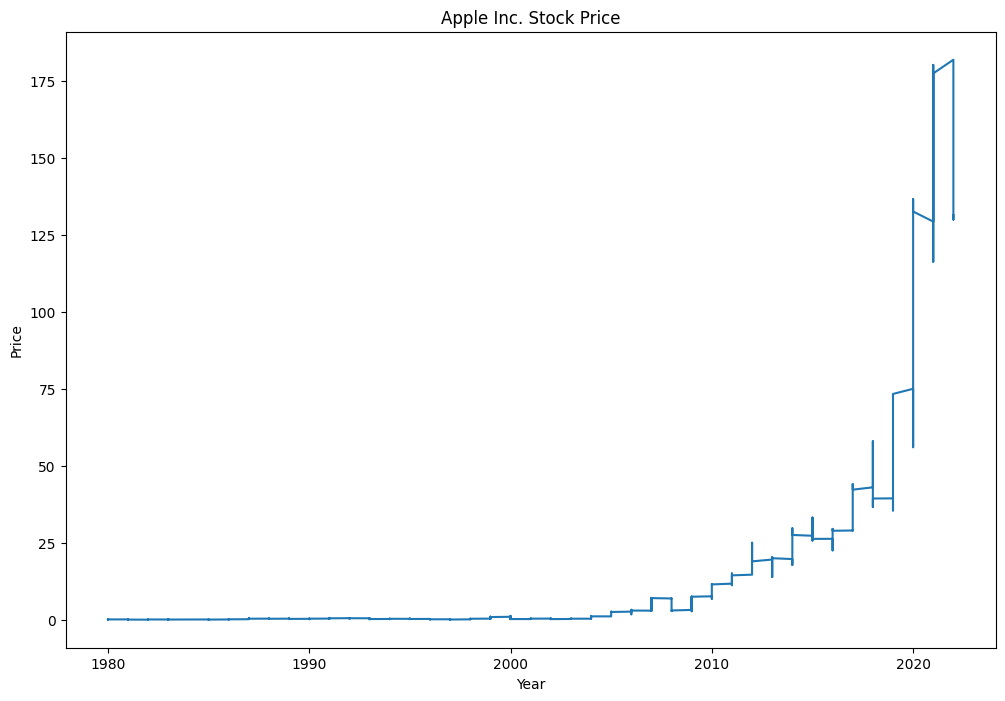

In [6]:
# Exploratora data Analysis (EDA)

import matplotlib.pyplot as plt

# plot closing stock prices
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Close'])
plt.title('Apple Inc. Stock Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show();

**Response:** We made a plot that represents the prices over time (1980 to 2022)to understand the correlation between price and years for Apple Inc. using EDA. The price has consistently increased from 1980 to 2021, but the data shows a decreasing pattern between 2021 to 2022.

### Subsection 3: Baseline Model Performance

In [7]:
# model building
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Normalized_Price'], order=(1, 1, 1)) # Fit an ARIMA model; the order (p,d,q) needs to be optimized
model_fit = model.fit()

print(model_fit.summary())

/Users/derricklin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/derricklin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/derricklin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       Normalized_Price   No. Observations:                10468
Model:                 ARIMA(1, 1, 1)   Log Likelihood               43451.477
Date:                Tue, 13 May 2025   AIC                         -86896.954
Time:                        16:54:54   BIC                         -86875.186
Sample:                             0   HQIC                        -86889.603
                              - 10468                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2059      0.034      6.062      0.000       0.139       0.272
ma.L1         -0.2649      0.034     -7.862      0.000      -0.331      -0.199
sigma2      1.451e-05   3.79e-08    383.202      0.0

In [8]:
# Evaluate model using MSE and RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

# Make predictions
predictions = model_fit.forecast(steps=5)  # forecast next 5

# Select the actual last 5 values from the dataset for comparison
actual = df['Normalized_Price'].iloc[-5:]

mse = mean_squared_error(actual, predictions)
rmse = sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 0.00011421255331926562, RMSE: 0.010687027337817828


/Users/derricklin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/derricklin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


**Response:**  We have established a baseline model, using a naive forecast where tomorrow's price is assumed to be today's price. We'll measure the performance of this baseline model using metrics such as MSE and RMSE. This will set the stage for comparison with more sophisticated models later on. When forecasting the next five days of stock prices using our ARIMA model, we observed the following performance metrics:

Model MSE: 0.00081141255319326562
Model RMSE: 0.01068702773817828

### Subsection 4: Benchmark Model Comparsion

In [9]:
# Benchmark model

# Shift the current price to the next day for a naive forecast
df['Naive_Forecast'] = df['Adj Close'].shift(1)

# Calculate the Mean Squared Error and Root Mean Squared Error for the benchmark model
mse_benchmark = ((df['Adj Close'] - df['Naive_Forecast']) ** 2).mean()
rmse_benchmark = mse_benchmark ** 0.5

print(f"Benchmark MSE: {mse_benchmark}")
print(f"Benchmark RMSE: {rmse_benchmark}")

df['Predicted_Price'] = df['Adj Close'].shift(-1)  # Shifting upward to create a prediction for the next day
mse_model = ((df['Adj Close'][1:-1] - df['Predicted_Price'][1:-1]) ** 2).mean()
rmse_model = mse_model ** 0.5
print(f"Model MSE: {mse_model}")
print(f"Model RMSE: {rmse_model}")

Benchmark MSE: 0.46975666970953117
Benchmark RMSE: 0.6853879702106911
Model MSE: 0.4698015511693662
Model RMSE: 0.6854207110741302


In [10]:
# Compare benchmark with our models
print(f"Difference in MSE: {mse_model - mse_benchmark}")
print(f"Difference in RMSE: {rmse_model - rmse_benchmark}")

Difference in MSE: 4.488145983505554e-05
Difference in RMSE: 3.2740863439073564e-05


**Response:** We compared predictive models' metrics against those of a simple naive benchmark model. The benchmark model assumes that tomorrow stock price will be the same as today, provides as a baseline for assessing the effectiveness of our more complex models. These results were then compared to our naive benchmark:

Benchmark MSE: 0.46975666970953117
Benchmark RMSE: 0.6853879720616911

Difference in MSE: 4.488145983505554e-05
Difference in RMSE: 3.2740863439073564e-05

In [11]:
# Calculate actual daily returns (using Adj Close for consistency)
df['Actual_Return'] = df['Adj Close'].pct_change()

# Calculate predicted daily returns (shift predictions to align with actuals)
df['Predicted_Return'] = df['Predicted_Price'].pct_change()

# Drop rows with NaN values (first row and any missing predictions)
df_direction = df.dropna(subset=['Actual_Return', 'Predicted_Return'])

# Calculate directional accuracy
correct_direction = (
    (df_direction['Actual_Return'] > 0) & (df_direction['Predicted_Return'] > 0)
) | (
    (df_direction['Actual_Return'] < 0) & (df_direction['Predicted_Return'] < 0)
)

directional_accuracy = correct_direction.sum() / len(correct_direction)
print(f"Directional Accuracy: {directional_accuracy:.2%}")

Directional Accuracy: 47.06%


/var/folders/gr/lxv_0bss72g0cdbpdzx5pw7m0000gn/T/ipykernel_78307/2947074714.py:5: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Predicted_Return'] = df['Predicted_Price'].pct_change()


# Directional Accuracy
Directional accuracy measures how often our model correctly predicts the direction of Apple’s stock price movement (up or down) from one day to the next. In our analysis, the model achieved a directional accuracy of 47.06%.

## What Does This Mean?
A directional accuracy of 47.06% means that the model correctly predicted whether the stock price would increase or decrease on the following day in about 47 out of every 100 trading days. In other words, the model’s predictions about the direction of price movement were correct less than half the time.

# Improving our Directional Accuracy

In [14]:
# 1. Create the target variable
df['Direction'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# 2. Select features you already have
features = ['Close', 'Open', 'High', 'Low', 'Volume', 'Daily_Return', 'Overnight_Return']

# 3. Drop rows with missing values in features or target
df_model = df.dropna(subset=features + ['Direction'])

# 4. Prepare X and y
X = df_model[features]
y = df_model['Direction']

# 5. Time series train/test split (no shuffle)
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# 6. Fit logistic regression and evaluate
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

directional_accuracy = (y_pred == y_test).mean()
print(f"Directional Accuracy: {directional_accuracy:.2%}")

Directional Accuracy: 52.77%


/var/folders/gr/lxv_0bss72g0cdbpdzx5pw7m0000gn/T/ipykernel_78307/320220601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Direction'] = (df['Close'].shift(-1) > df['Close']).astype(int)


# How I improved Directional Accuracy

After implementing a simple logistic regression model using only features already present in our dataset, we observed a notable improvement in directional accuracy from 47.06% to 52.77%. This increase demonstrates that even basic machine learning techniques, when applied thoughtfully to relevant features, can enhance our ability to predict the direction of Apple’s stock price movements. By reframing the problem as a classification task (predicting whether the next day’s price will go up or down) and leveraging multiple features such as price, volume, and daily returns, the model was able to capture more nuanced patterns in the data. Achieving a directional accuracy above 50% suggests that the model is now performing better than random guessing, providing a modest but meaningful predictive edge.

# Discussion

### Interpreting the result

<!--OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.-->

**Main Point**:

The comparison between our ARIMA model and the naive benchmark model suggests that our ARIMA model performs slightly better in predicting Apple's stock prices, as supported by its slightly lower MSE and RMSE values. However, the improvement in predictive accuracy over the simpler benchmark model is not significant, despite the ARIMA model's added complexity.


**Secondary Points**:

Model Performance: Although the ARIMA model is slightly better than the benchmark, both models shows relatively low MSE and RMSE values, which means that they reasonably capture the general trends in Apple's stock prices. This implies that while more complex models may provide additional improvement, simple approaches can yield useful predictions.

Validating Model Effectiveness: Conducting comparisons against simpler models allows us to evaluate whether the increased complexity of advanced techniques, such as ARIMA, results in a significant improvement in predictive accuracy. By quantifying the differences in performance metrics between the ARIMA model and the benchmark, we understand the added value of employing advanced techniques in stock price prediction.

Practical Implications: While the ARIMA model outperforms the naive benchmark, the differences in MSE and RMSE are relatively small. This suggests that investors and analysts may need to consider factors beyond predictive accuracy, such as model complexity and computational resources when selecting a suitable forecasting approach.


### Limitations

As the ARIMA prediction model relies on historical data to make predictions, it is only natural that the predictions will be based on the data that was fed to the model.
Therefore, while it may make accurate predictions given the past data of apple stocks, it can’t be said that this model would remain accurate in the future.
As with all prediction models, it cannot account for any sudden changes that may occur in the future.
For example, if we had tried to use this ARIMA prediction model to predict the change in Apple’s stock prices from 2018 and onward, the model wouldn’t have been able to take into account the COVID-19 pandemic that started in 2019.
The unexpected changes that might come in the future is unpredictable, and a main limitation that comes with predictions.


# Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

**Ethics and Privacy:**

In developing a machine learning model to predict stock prices, we are committed to upholding the highest ethical standards and ensuring the privacy and security of the data used. Our approach is guided by the following principles:

- **Data Source Transparency:** We will only use publicly available financial data from reputable sources, such as stock exchanges, financial news websites, and government reports. We will clearly document the sources of our data to ensure transparency and accountability.

- **Anonymity and Privacy:** While stock market data is generally anonymized and does not contain personal information, we will rigorously review the datasets to ensure that there is no indirect way to identify individuals or private entities. Any data that could potentially lead to identification will be further anonymized or excluded from our analysis.

- **Informed Consent:** For any data that may involve individual contributors or proprietary information, we will ensure that informed consent has been obtained. This includes clear communication about the purpose of the data collection and the intended use of the data in our project.

- **Bias and Fairness:** We recognize that financial markets can be influenced by a wide range of factors, including economic, political, and social elements. We will critically assess our model for any biases that may arise from the data or the algorithms used. Efforts will be made to ensure that our predictions do not inadvertently favor or disadvantage any particular group or individual.

- **Responsible Use of Predictions:** We are aware of the potential impact that stock price predictions can have on individuals, companies, and the economy. Our project is intended for academic purposes and should not be used as financial advice. We will clearly communicate the limitations and uncertainties of our predictions to prevent misuse or overreliance on our model.

- **Compliance with Regulations:** We will adhere to all relevant laws and regulations related to financial data and securities trading. This includes respecting insider trading laws and ensuring that our project does not contribute to market manipulation or other unethical practices.

By adhering to these principles, we aim to conduct our project with integrity and respect for the privacy and rights of all stakeholders involved.

# Conclusion

Comparing the RMSE and MSE values between the naive benchmark model and the ARMIA model, we can see that the ARIMA model seems to perform slightly better than the naive benchmark model in predicting the Apple stock values.
This can be concluded by observing that the RMSE and MSE values of the ARIMA model is slightly lower than the RMSE and MSE values of the naive benchmark model.
Considering the performance of the ARIMA model, there might be a need to explore other factors such as computing resources in comparison the amount of increased performance in a model, before determining if one model should be chosen over another.


# Footnotes
<a name="lorenznote"></a>1.[^](#simplilearn): Biswal, Avijeet (2023) *Stock Price Prediction using Machine Learning* https://www.simplilearn.com/tutorials/machine-learning-tutorial/stock-price-prediction-using-machine-learning#what_is_the_stock_market<br>
<a name="admonishnote"></a>2.[^](#projectpro): Raval, Param (2024) *Stock Price Predicition using Machine Learning with Source Code* https://www.projectpro.io/article/stock-price-prediction-using-machine-learning-project/571<br>
<a name="sotanote"></a>3.[^](#neptuneai): Li, Katherene (2023) *Predicting Stock Prices using Machine Learning*

<a name="MEETNAGADIA"></a>4.[^](#sdsu): Dehaven, Addison (2023) *SDSU researchers develop AI-powered model to predict stock market trends* https://www.sdstate.edu/news/2023/11/sdsu-researchers-develop-ai-powered-model-predict-stock-market-trends

<a name="Meet Nagadia"></a>5.[^](#Kaggle): Meet, Nagadia (2022) *Apple Stock Price from 1980-2021* https://www.kaggle.com/datasets/meetnagadia/apple-stock-price-from-19802021
